In [2]:
# Libraries 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np 
import pandas as pd 
import cv2
from PIL import Image
import os

Using TensorFlow backend.
/home/sakshi/dlProject/dlproject/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sakshi/dlProject/dlproject/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sakshi/dlProject/dlproject/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sakshi/dlProject/dlp

In [3]:
# Reading the input images and putting them into a numpy array
height = 30
width = 30
channels = 3
classes = 43
n_inputs = height * width*channels

def preprocess(image):
    img = Image.fromahrray(image,'RGB')
    size_image = img.resize((height, width))
    return size_image
    
def getTrainingData () :  
    
    data = []
    labels = []

    for i in range(classes) :
        path = "gtsrb_dataset/train/{0}/".format(i)
        Class=os.listdir(path)
        for a in Class:
            try:
                image=cv2.imread(path+a)
                size_image = preprocess(image)
                data.append(np.array(size_image))
                labels.append(i)
            except AttributeError:
                print("Error")
                
    return (data,labels)

In [4]:
data, labels = getTrainingData()

Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(43)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]

In [5]:
#Spliting the images into train and validation sets
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train = X_train.astype('float32')/255 
X_val = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)

In [6]:
#Definition of the DNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.summary();

#Compilation of the model
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)        

In [7]:
#using ten epochs for the training and saving the accuracy for each epoch
epochs = 10
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
validation_data=(X_val, y_val))



Train on 31368 samples, validate on 7841 samples
Epoch 1/10
31368/31368 [==============================] - 61s 2ms/step - loss: 1.2855 - accuracy: 0.6324 - val_loss: 0.1408 - val_accuracy: 0.9619
Epoch 2/10
31368/31368 [==============================] - 62s 2ms/step - loss: 0.2346 - accuracy: 0.9292 - val_loss: 0.0482 - val_accuracy: 0.9915
Epoch 3/10
31368/31368 [==============================] - 62s 2ms/step - loss: 0.1328 - accuracy: 0.9599 - val_loss: 0.0232 - val_accuracy: 0.9941
Epoch 4/10
31368/31368 [==============================] - 62s 2ms/step - loss: 0.1051 - accuracy: 0.9692 - val_loss: 0.0271 - val_accuracy: 0.9939
Epoch 5/10
31368/31368 [==============================] - 62s 2ms/step - loss: 0.0822 - accuracy: 0.9744 - val_loss: 0.0275 - val_accuracy: 0.9927
Epoch 6/10
31368/31368 [==============================] - 62s 2ms/step - loss: 0.0762 - accuracy: 0.9762 - val_loss: 0.0136 - val_accuracy: 0.9966
Epoch 7/10
31368/31368 [==============================] - 62s 2ms/st

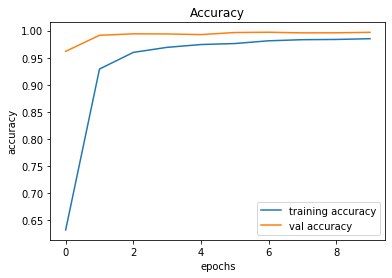

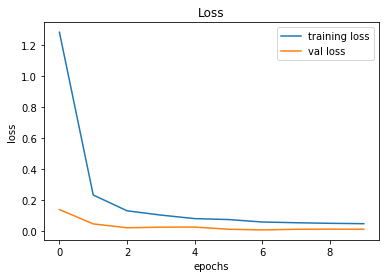

In [8]:
#Display of the accuracy and the loss values

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [9]:
#Predicting with the test data
y_test=pd.read_csv("gtsrb_dataset/Test.csv")
labels=y_test['Path'].as_matrix()
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('gtsrb_dataset/test/'+f.replace('Test/', ''))
    size_image = preprocess(image)
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)

/home/sakshi/dlProject/dlproject/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
#Accuracy with the test data
accuracy_score(y_test, pred)

0.9688836104513064

In [11]:
pred

array([16,  1, 38, ..., 32,  7, 10])

In [12]:
def out(model,image_name):
    image = cv2.imread(image_name)
    size_image = preprocess(image)
    data = []
    data.append(np.array(size_image))
    X_test = np.array(data)
    X_test = X_test.astype('float32')/255 
    pred = model.predict_classes(X_test)
    return pred[0]


In [6]:
predicted_class = out(model, 'gtsrb_dataset/test/00024.png')
print (predicted_class)

1


In [7]:
predicted_class

1

In [1]:
import dill
dill.load_session('gtsrb.db')

Using TensorFlow backend.
/home/sakshi/dlProject/dlproject/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sakshi/dlProject/dlproject/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sakshi/dlProject/dlproject/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sakshi/dlProject/dlp

In [2]:
predicted_class = out(model, 'gtsrb_dataset/test/00024.png')
print (predicted_class)

1
